In [4]:
# imports habituels
import numpy as np
import os
import matplotlib

SPAM_PATH = "/home4/ep298479/Documents/S9-UBFC/Machine_Learning/TD3/"


## Q1 - Préparation des données

### a - Téléchargement du jeu de données

Chargement du dataframe

In [5]:
import pandas as pd

def load_spam_data(spam_path=SPAM_PATH):
    csv_path = os.path.join(spam_path, "sms_spam.csv")
    print(csv_path)
    return pd.read_csv(csv_path)
sms_raw = load_spam_data()

/home4/ep298479/Documents/S9-UBFC/Machine_Learning/TD3/sms_spam.csv


Affichage du début du dataframe

In [6]:
sms_raw.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


Taille du dataframe

In [7]:
len(sms_raw.value_counts())

5156

Nombre de spam VS nombre de non-spam

In [8]:
spam_count = len(sms_raw[sms_raw.type == "spam"].value_counts())
ham_count = len(sms_raw[sms_raw.type == "ham"].value_counts())
print("Spam : ",spam_count)
print("Ham : ",ham_count)
print("Somme :",ham_count+spam_count)

Spam :  653
Ham :  4503
Somme : 5156


### b - Séparation ham/spam et SMS

Variable X contenant les SMS et Y contenant les label ham/spam

In [9]:
X = sms_raw["text"]
X.head()

0    Hope you are having a good week. Just checking in
1                              K..give back my thanks.
2          Am also doing in cbe only. But have to pay.
3    complimentary 4 STAR Ibiza Holiday or £10,000 ...
4    okmail: Dear Dave this is your final notice to...
Name: text, dtype: object

In [10]:
Y = sms_raw["type"]
Y.head()

0     ham
1     ham
2     ham
3    spam
4    spam
Name: type, dtype: object

### c - Standardisation des données textes

Import de la librairie NLTK pour traiter du texte.
Import du module PUNKT de NLTK pour tokenizer.

In [11]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer , LancasterStemmer

[nltk_data] Downloading package punkt to /home1/ep298479/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home1/ep298479/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


EXEMPLE : Division des messages en mots (tokens).

In [12]:

token_words = word_tokenize(X[0])
print(token_words)

['Hope', 'you', 'are', 'having', 'a', 'good', 'week', '.', 'Just', 'checking', 'in']


EXEMPLE : Processus de _stemming_ avec divers algorithmes (Algorithme Porter et Lancaster)

In [13]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

sep = "--------------------"
word_list = ["friend", "Friendship", "friends" , "friendships", "Friends", "moon", "Moonlight"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","Lancaster Stemmer"))
print("{0:20}{1:20}{2:20}".format(sep,sep,sep))
for word in word_list:
      print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))


Word                Porter Stemmer      Lancaster Stemmer   
------------------------------------------------------------
friend              friend              friend              
Friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
Friends             friend              friend              
moon                moon                moon                
Moonlight           moonlight           moonlight           


EXEMPLE : Suppression de la ponctuation (match avec le regex \w)

In [16]:
tokenizer = nltk.RegexpTokenizer("\w+")
new_words = tokenizer.tokenize(X[0])
print("Phrase originale :",X[0])
print("Suppression ponctuation :", new_words)

Phrase originale : Hope you are having a good week. Just checking in
Suppression ponctuation : ['Hope', 'you', 'are', 'having', 'a', 'good', 'week', 'Just', 'checking', 'in']


EXEMPLE : Suppression des stop words

In [17]:
stop_words = set(stopwords.words("english"))
stem = []
for word in new_words:
      if word not in stop_words:
            stem.append(word)

print("Tokenization originale :",new_words)
print("Tokenization sans stop-words :", stem)

Tokenization originale : ['Hope', 'you', 'are', 'having', 'a', 'good', 'week', 'Just', 'checking', 'in']
Tokenization sans stop-words : ['Hope', 'good', 'week', 'Just', 'checking']


Méthode **stemSentence(message)** normalisant un message.
Application de divers processus : 
* Tokenization
* Stemming
* Suppression des stop-words et des nombres

In [18]:
def stemSentence(sentence):
      tokenizer = nltk.RegexpTokenizer("[a-zA-Z]+")
      token_words = tokenizer.tokenize(sentence)
      stop_words = set(stopwords.words("english"))
      stem_sentence=[]

      for word in token_words:
            if word not in stop_words:
                  stem_sentence.append(porter.stem(word))
                  stem_sentence.append(" ")
      return "".join(stem_sentence)

Exemple sur une phrase :

In [19]:
print("Message original : ",X[0])
print("Méthode stemSentence appliqué au message : ",stemSentence(X[0]))

Message original :  Hope you are having a good week. Just checking in
Méthode stemSentence appliqué au message :  hope good week just check 


Application de la fonction de normalisation à l'ensemble des SMS :

In [20]:
stemX = [stemSentence(message) for message in X]
print(stemX)

['hope good week just check ', 'k give back thank ', 'am also cbe but pay ', 'complimentari star ibiza holiday cash need urgent collect now landlin lose box sk wp ppm ', 'okmail dear dave final notic collect tenerif holiday cash award call landlin tc sae box cw wx ppm ', 'aiya discuss later lar pick u ', 'are much buzi ', 'pleas ask mummi call father ', 'marvel mobil play offici ultim spider man game ur mobil right text spider game send u free ball wallpap ', 'fyi i usf swing room whenev ', 'sure thing big man hockey elect go longer hour though ', 'i anyth lor ', 'by march end readi but call sure the problem capit never complet how far how work ladi ', 'hmm well night night ', 'k i sure get noon see ', 'ha ha cool cool chikku chikku db ', 'darren say dat u meet da ge den dun meet dinner co later u leav xy feel awkward den u meet lunch lor ', 'he dint tell anyth he angri told abi ', 'up u u wan come come lor but din c stripe skirt ', 'u win music gift voucher everi week start now txt wo

### d - Division du texte en mots

Tokenization en utilisant la méthode **CountVectorizer** convertissant la liste de messages en matrice document-terme (DTM)

On peut utiliser le paramètre min_df pour garder seulement à partir d'un certain nombre d'occurences

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5)
X_dtm = vectorizer.fit_transform(stemX)
print(X_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### e - Création des jeux d'entraînement et jeux de test

* 75% pour les jeux d'entraînement
* 25% pour les jeux de test

In [22]:
from sklearn.model_selection import train_test_split

X_train_set, X_test_set, Y_train_set, Y_test_set = train_test_split(X_dtm,Y, test_size=0.25, random_state=1)

Affichage d'un wordcloud

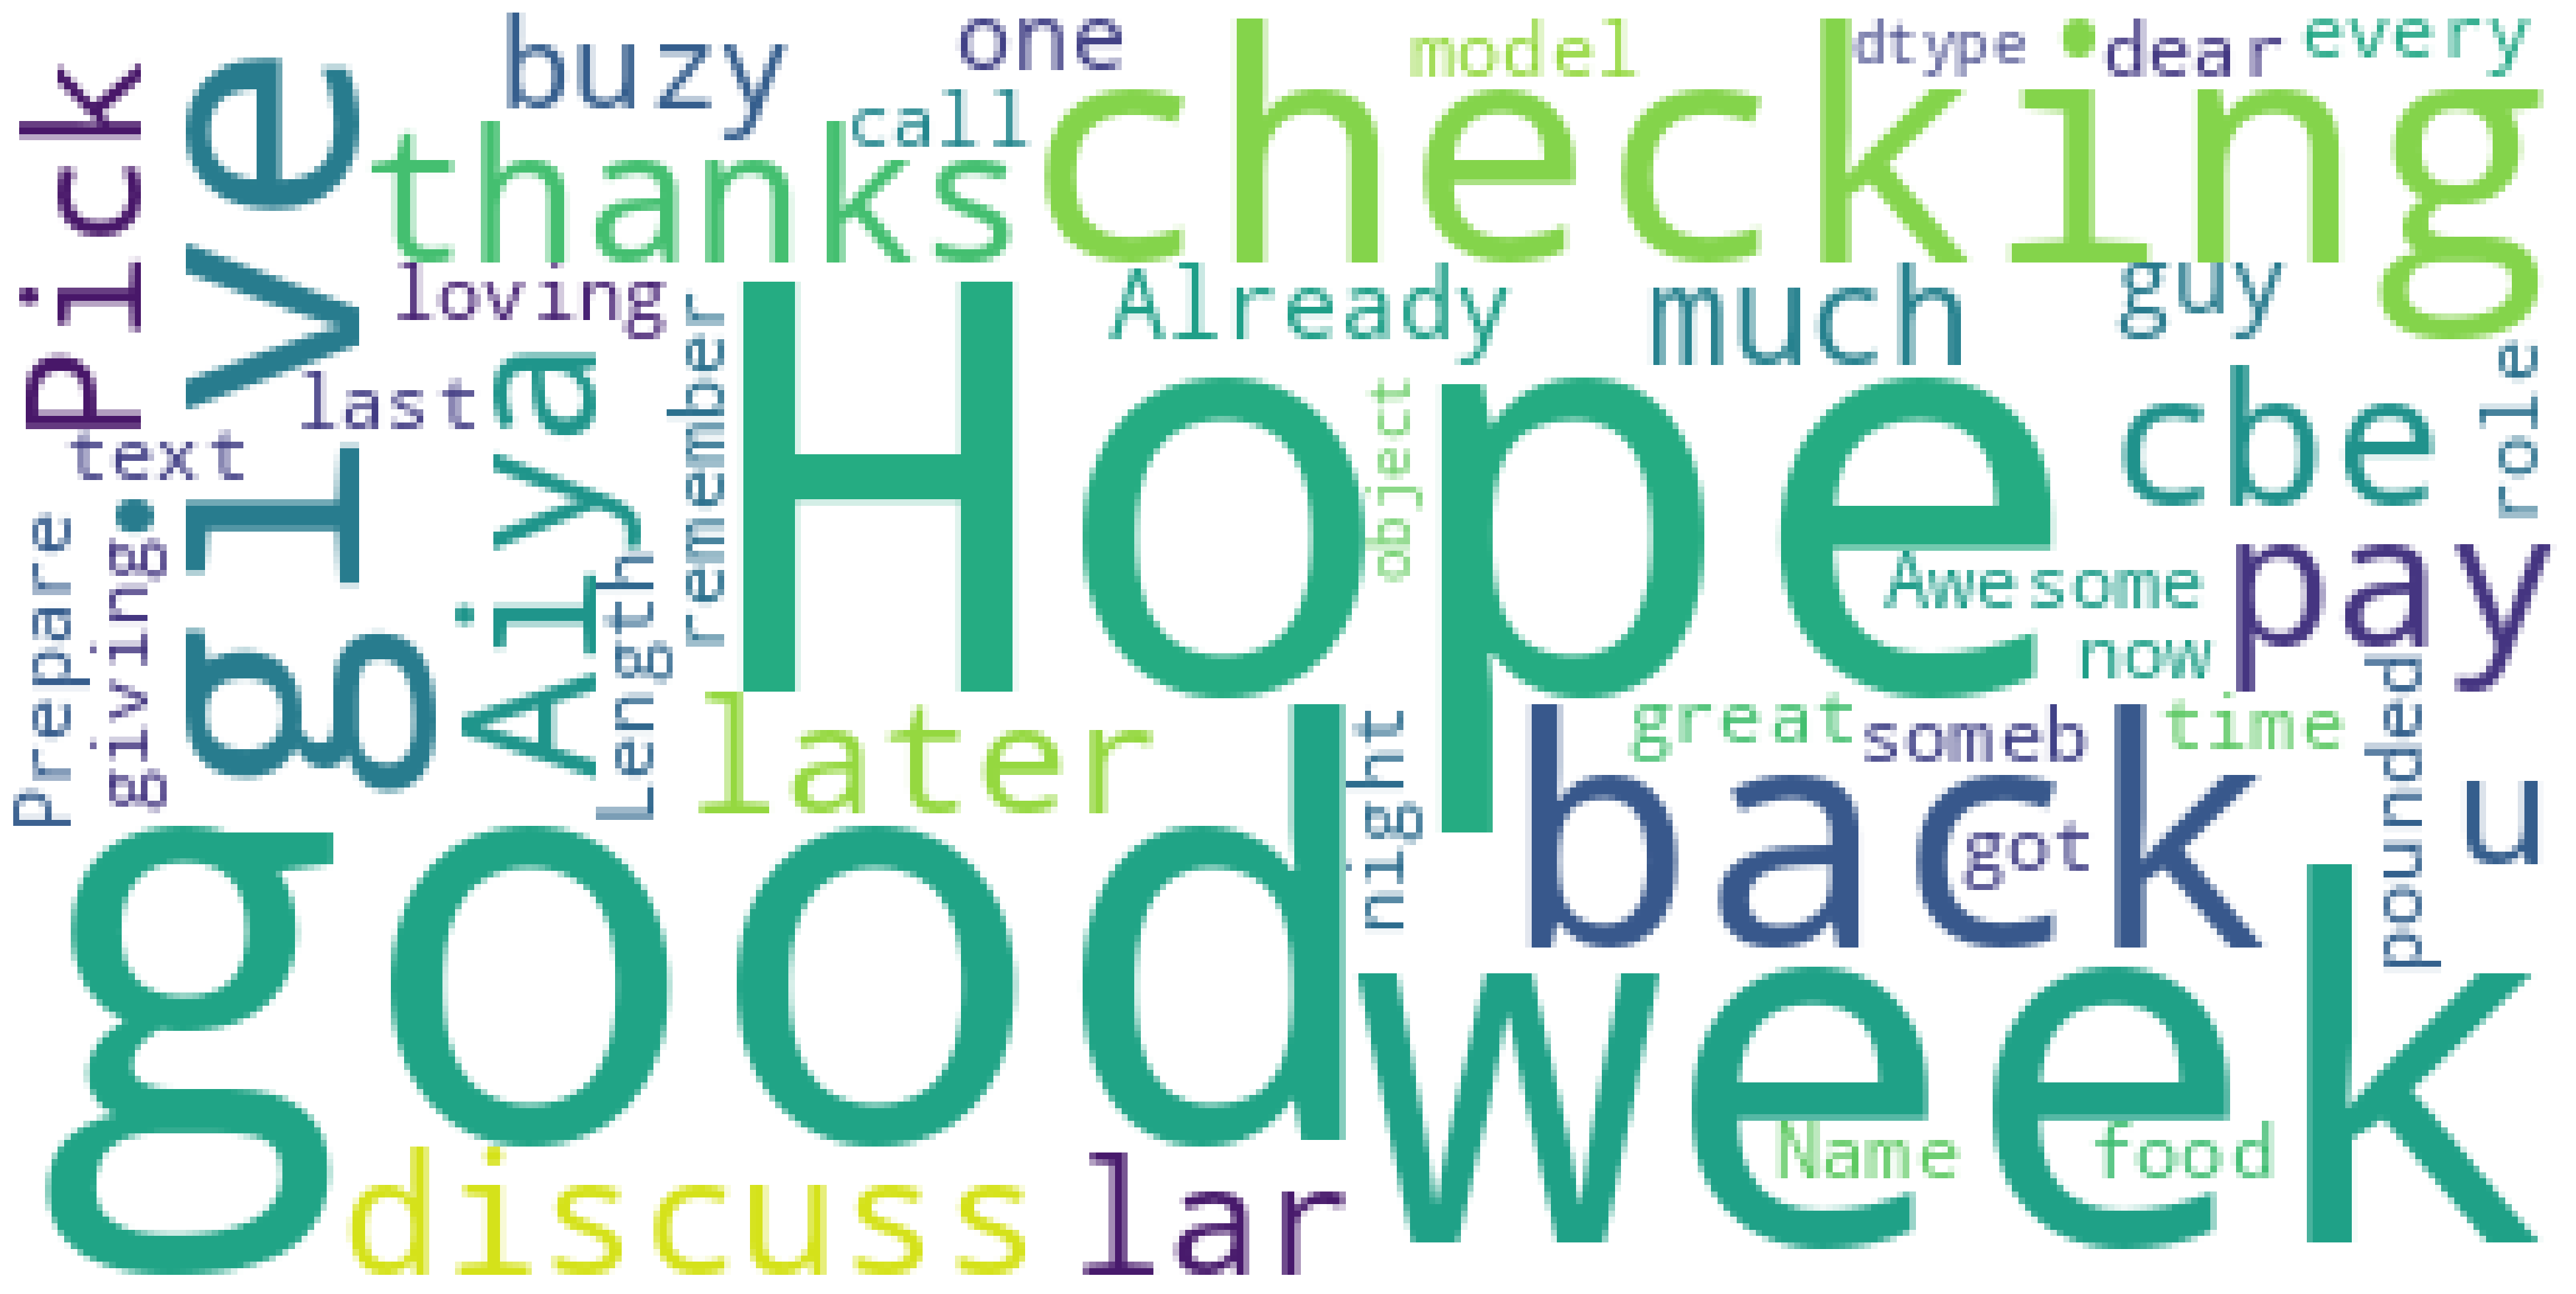

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white").generate(str(sms_raw[sms_raw.type == "ham"]["text"]))
fig = plt.figure(1, figsize=(50, 50))
plt.axis('off')

plt.imshow(wc)
plt.show()

Entraînement du modèle

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


MNB = MultinomialNB()
MNB.fit(X_train_set,Y_train_set.values)
Y_expect = Y_test_set
Y_predict = MNB.predict(X_test_set)
accuracy = accuracy_score(Y_expect,Y_predict)
confusion_matrix = confusion_matrix(Y_expect,Y_predict)

print("Vrais positifs :",confusion_matrix[0][0])
print("Faux positifs :",confusion_matrix[1][0])
print("Faux négatifs :",confusion_matrix[0][1])
print("Vrais négatifs :",confusion_matrix[1][1])

print("-----")

print("VRAIS :", confusion_matrix[0][0]+confusion_matrix[1][1])
print("FAUX :", confusion_matrix[1][0]+confusion_matrix[0][1])
print("Précision :",accuracy)


Vrais positifs : 1181
Faux positifs : 13
Faux négatifs : 9
Vrais négatifs : 187
-----
VRAIS : 1368
FAUX : 22
Précision : 0.9841726618705036
